<a href="https://colab.research.google.com/github/mounisha123-ram/Employee-Attrition-Prediction/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **                 Employee Attrition Analysis and Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import pickle

In [ ]:
# Load your dataset
df = pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')
pd.set_option('display.max_columns', None)  # to display all the columns

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

# **Data Preprocessing**

In [ ]:
# Standardize column names
df.columns = (
    df.columns
    .str.strip()                         # remove leading/trailing spaces
    .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)  # convert camelCase to snake_case
    .str.replace(' ', '_')              # replace spaces with underscore
    .str.lower()                        # convert to lowercase
)

# Drop constant/unnecessary columns like EmployeeCount, StandardHours, Over18
df.drop(['employee_count', 'standard_hours', 'over18','employee_number'], axis=1, inplace=True)

In [ ]:
df.shape

(1470, 31)

In [ ]:
df.dtypes

,0
age,int64
attrition,object
business_travel,object
daily_rate,int64
department,object
distance_from_home,int64
education,int64
education_field,object
environment_satisfaction,int64
gender,object


In [ ]:
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
df.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1470 non-null   object
 3   daily_rate                  1470 non-null   int64 
 4   department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   int64 
 7   education_field             1470 non-null   object
 8   environment_satisfaction    1470 non-null   int64 
 9   gender                      1470 non-null   object
 10  hourly_rate                 1470 non-null   int64 
 11  job_involvement             1470 non-null   int64 
 12  job_level                   1470 non-null   int64 
 13  job_role                    1470 non-null   obje

,age,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
print(df['attrition'].unique())
print(df['attrition'].value_counts())

['Yes' 'No']
attrition
No     1233
Yes     237
Name: count, dtype: int64


In [ ]:
#checking missing values
df.isnull().sum()

,0
age,0
attrition,0
business_travel,0
daily_rate,0
department,0
distance_from_home,0
education,0
education_field,0
environment_satisfaction,0
gender,0


In [ ]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#to see the total count of negative values in our datset
(df.select_dtypes(include='number') < 0).sum().sum()

np.int64(0)

# **EDA**

In [ ]:
print(df.select_dtypes(include=['int64',"float64"]).columns)

Index(['age', 'daily_rate', 'distance_from_home', 'education',
       'environment_satisfaction', 'hourly_rate', 'job_involvement',
       'job_level', 'job_satisfaction', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')


In [ ]:
df.select_dtypes(exclude=['int64',"float64"])

,attrition,business_travel,department,education_field,gender,job_role,marital_status,over_time
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


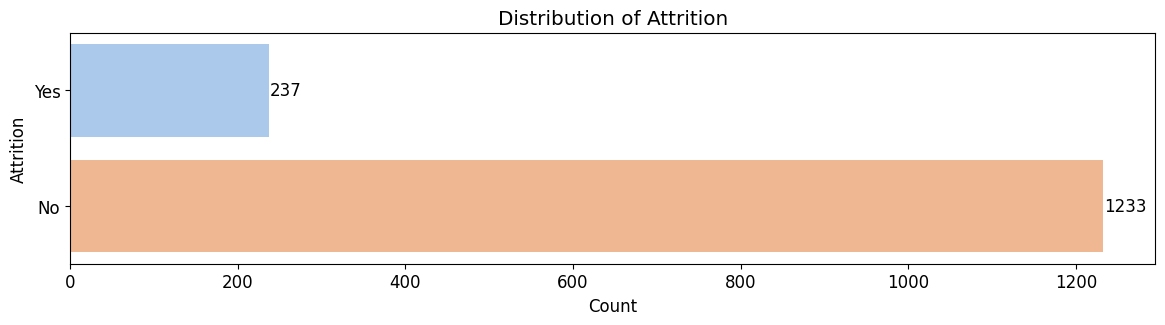

In [ ]:
# Countplot for Attrition (target column)
plt.figure(figsize=(14, 3))
ax = sns.countplot(y='attrition', data=df, palette='pastel')
plt.title("Distribution of Attrition")
plt.xlabel("Count")
plt.ylabel("Attrition")

# Add count labels on bars
for p in ax.patches:
    count = int(p.get_width())
    ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2, count, va='center')

plt.show()

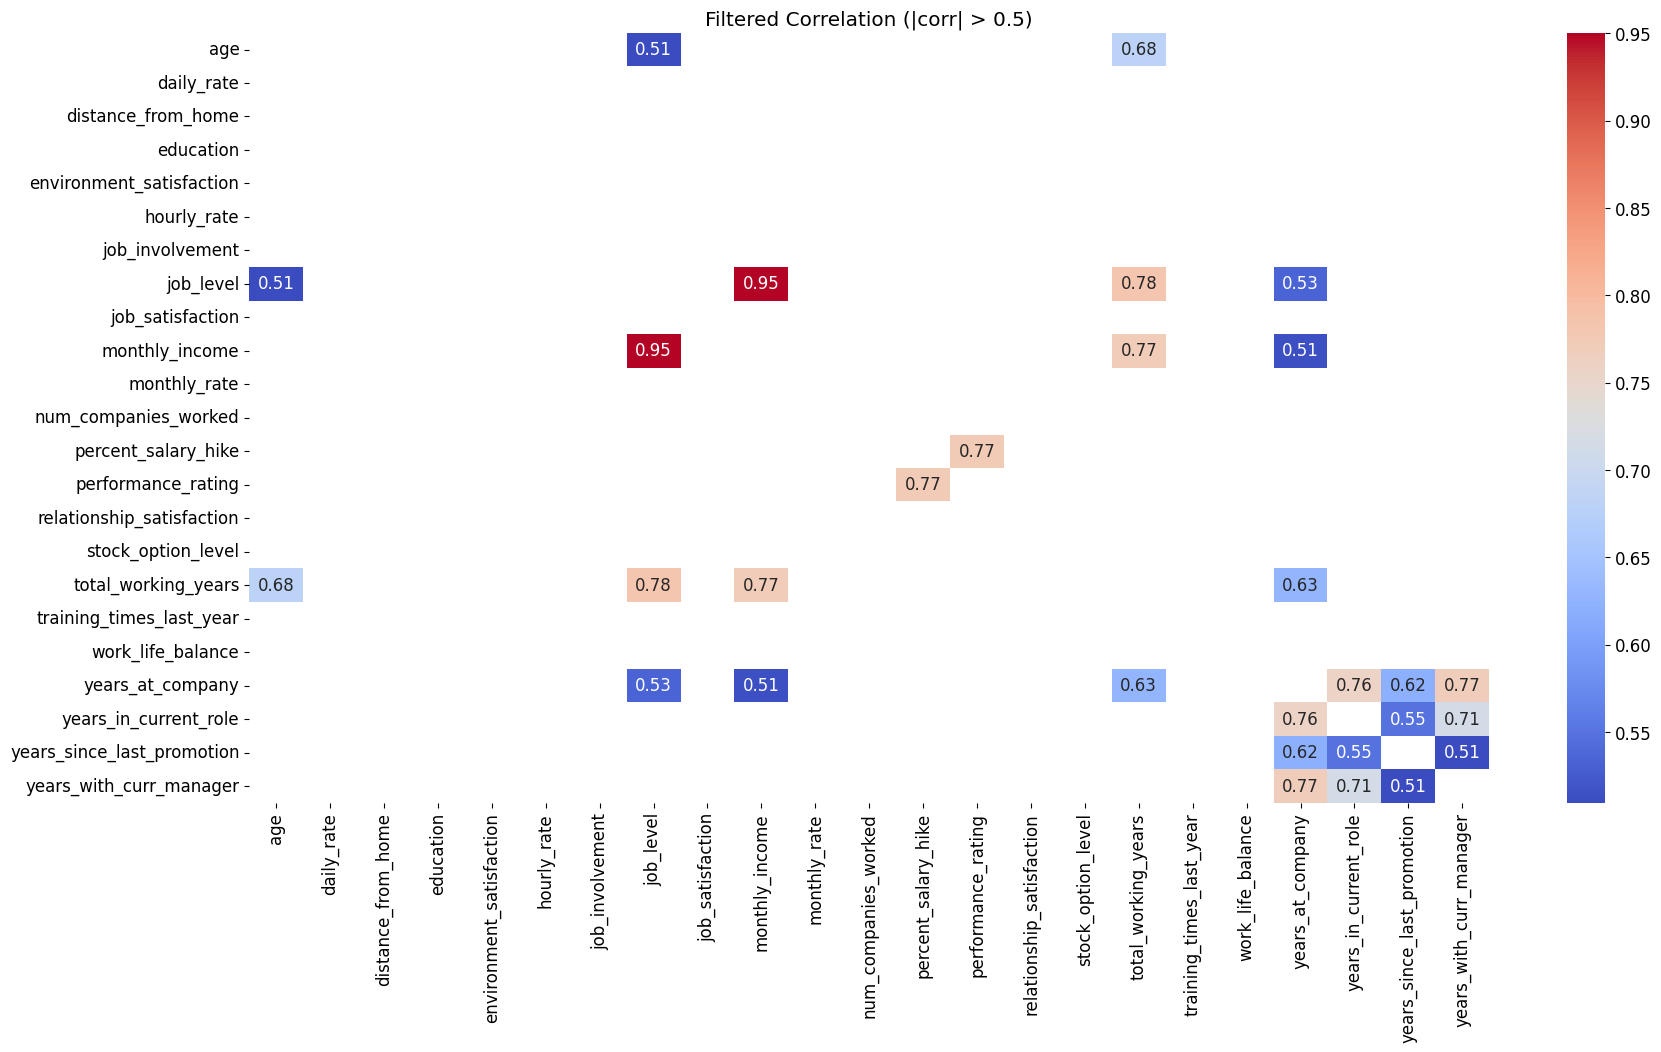

In [ ]:
# Full correlation matrix
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Filter strong correlations
strong_corr = corr_matrix[(corr_matrix.abs() > 0.5) & (corr_matrix.abs() < 1.0)]

plt.figure(figsize=(20, 10))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Filtered Correlation (|corr| > 0.5)')
plt.show()

In [ ]:
# Checking the Outliers and Distributions using Plotly

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Box Plots (for Outlier Detection)
for col in numerical_cols:
    fig = px.box(df, y=col, title=f'Box Plot of {col}', points="all", template="plotly_white")
    fig.update_layout(yaxis_title=col, title_x=0.5)
    fig.show()

# Histograms with Rug Plot (for Distribution)
for col in numerical_cols:
    fig = px.histogram(df, x=col, title=f'Histogram of {col}', marginal="rug", nbins=30, template="plotly_white")
    fig.update_layout(xaxis_title=col, title_x=0.5)
    fig.show()

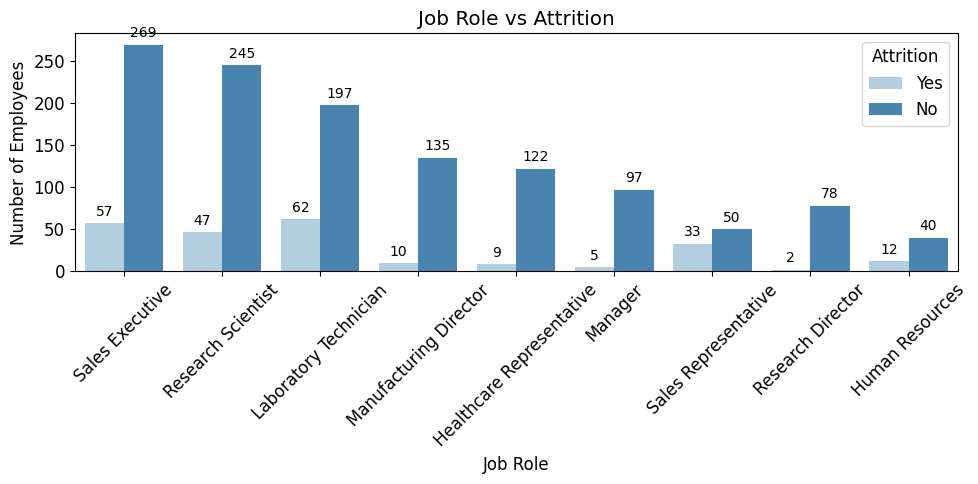

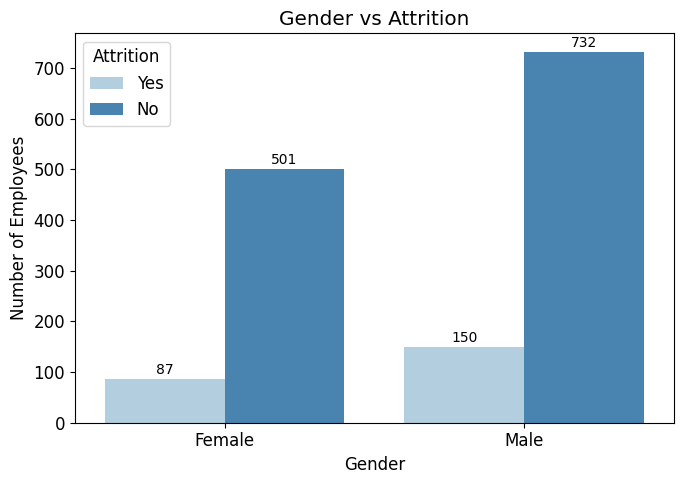

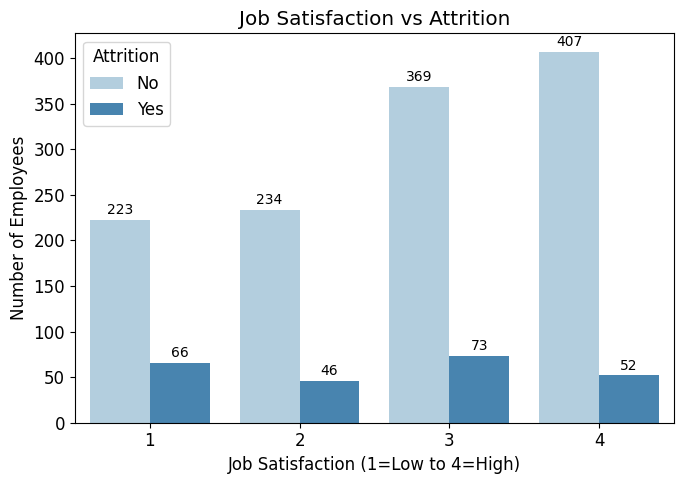

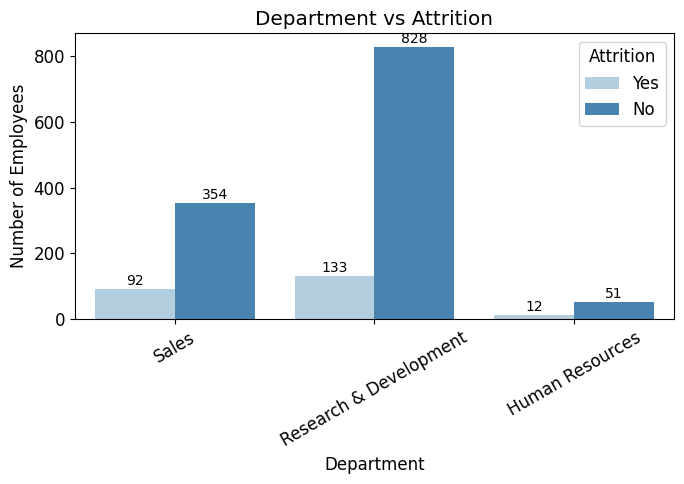

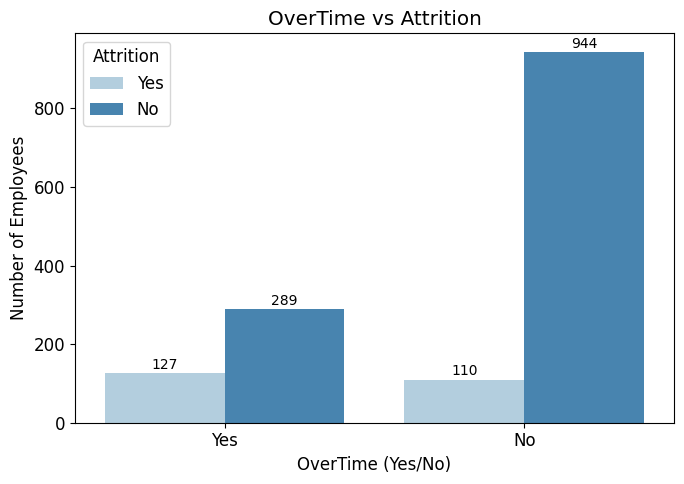

In [ ]:
# Set general font and style
plt.rcParams.update({'font.size': 12})
palette = 'Blues'

# Function to add count labels to bars
def add_labels(ax, offset=3):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2, height + offset, int(height),
                    ha='center', va='bottom', fontsize=10)

#Job Role vs Attrition
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='job_role', hue='attrition', data=df, palette=palette)
plt.title("Job Role vs Attrition")
plt.xticks(rotation=45)
plt.xlabel("Job Role")
plt.ylabel("Number of Employees")
add_labels(ax, offset=5)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

#Gender vs Attrition
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='gender', hue='attrition', data=df, palette=palette)
plt.title("Gender vs Attrition")
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
add_labels(ax)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

#Job Satisfaction vs Attrition
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='job_satisfaction', hue='attrition', data=df, palette=palette)
plt.title("Job Satisfaction vs Attrition")
plt.xlabel("Job Satisfaction (1=Low to 4=High)")
plt.ylabel("Number of Employees")
add_labels(ax)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

#Department vs Attrition
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='department', hue='attrition', data=df, palette=palette)
plt.title("Department vs Attrition")
plt.xticks(rotation=30)
plt.xlabel("Department")
plt.ylabel("Number of Employees")
add_labels(ax)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

#OverTime vs Attrition
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='over_time', hue='attrition', data=df, palette=palette)
plt.title("OverTime vs Attrition")
plt.xlabel("OverTime (Yes/No)")
plt.ylabel("Number of Employees")
add_labels(ax)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

In [ ]:
ordinal_features = ['education','environment_satisfaction','job_involvement','job_satisfaction',
                    'performance_rating','relationship_satisfaction','work_life_balance']
df[ordinal_features].head()

,education,environment_satisfaction,job_involvement,job_satisfaction,performance_rating,relationship_satisfaction,work_life_balance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


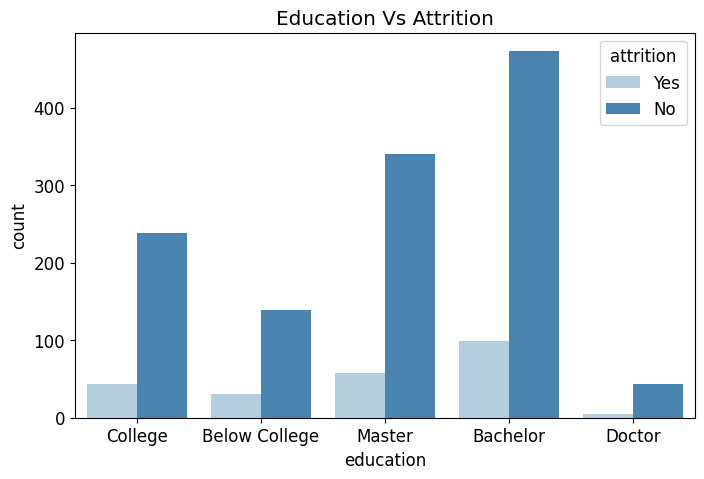

In [ ]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(8,5))
sns.countplot(x=df['education'].map(edu_map), hue='attrition', data=df, palette='Blues')
plt.title("Education Vs Attrition")
plt.show()

# **Attrition Prediction **

In [ ]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_employee_attrition_data.csv', index=False)

# Download the file
#files.download('cleaned_employee_attrition_data.csv')

In [ ]:
import pandas as pd
df=pd.read_csv('/content/cleaned_employee_attrition_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
df.dtypes

,0
age,int64
attrition,object
business_travel,object
daily_rate,int64
department,object
distance_from_home,int64
education,int64
education_field,object
environment_satisfaction,int64
gender,object


In [ ]:
df.head(5)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
# 1. Tenure Category based on years_at_company
df['tenure_category'] = pd.cut(
    df['years_at_company'],
    bins=[0, 2, 5, 10, df['years_at_company'].max()],
    labels=['<2 yrs', '2-5 yrs', '5-10 yrs', '10+ yrs'],
    include_lowest=True,
    right=False # Include the left edge, exclude the right edge
)

# 2. Engagement Score: weighted combination of satisfaction metrics
df['engagement_score'] = (
    0.4 * df['job_satisfaction'] +
    0.3 * df['job_involvement'] +
    0.2 * df['work_life_balance'] +
    0.1 * df['relationship_satisfaction']
)

# 3. Performance × Tenure Interaction
df['performance_tenure'] = df['performance_rating'] * df['years_at_company']


# ✅ Check the new columns
df[['tenure_category', 'engagement_score', 'performance_tenure']].head()

,tenure_category,engagement_score,performance_tenure
0,5-10 yrs,2.8,18
1,10+ yrs,2.4,40
2,<2 yrs,2.6,0
3,5-10 yrs,3.0,24
4,2-5 yrs,2.7,6


In [ ]:
df.dtypes

,0
age,int64
attrition,object
business_travel,object
daily_rate,int64
department,object
distance_from_home,int64
education,int64
education_field,object
environment_satisfaction,int64
gender,object


In [ ]:
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,tenure_category,engagement_score,performance_tenure
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,5-10 yrs,2.8,18
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,10+ yrs,2.4,40
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,<2 yrs,2.6,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,5-10 yrs,3.0,24
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,2-5 yrs,2.7,6


In [ ]:
df.select_dtypes(exclude=['int64',"float64"])

,attrition,business_travel,department,education_field,gender,job_role,marital_status,over_time,tenure_category
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,5-10 yrs
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,10+ yrs
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,<2 yrs
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,5-10 yrs
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,2-5 yrs
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No,5-10 yrs
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No,5-10 yrs
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes,5-10 yrs
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No,5-10 yrs


# **Encoding**

In [ ]:
# List of categorical columns to encode
categorical_cols = [
    'attrition', 'business_travel', 'department', 'education_field',
    'gender', 'job_role', 'marital_status', 'over_time','tenure_category'
]

# Apply Label Encoding directly to df
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.dtypes

,0
age,int64
attrition,int64
business_travel,int64
daily_rate,int64
department,int64
distance_from_home,int64
education,int64
education_field,int64
environment_satisfaction,int64
gender,int64


In [ ]:
df.dtypes

,0
age,int64
attrition,int64
business_travel,int64
daily_rate,int64
department,int64
distance_from_home,int64
education,int64
education_field,int64
environment_satisfaction,int64
gender,int64


In [ ]:
df.shape

(1470, 34)

In [ ]:
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,tenure_category,engagement_score,performance_tenure
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,2,2.8,18
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,2.4,40
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,3,2.6,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,2,3.0,24
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1,2.7,6


In [ ]:
df['attrition'].value_counts()

,count
attrition,
0,1233
1,237


# **Ml Model**

In [ ]:
# 1. Features and Target
X = df.drop('attrition', axis=1)
y = df['attrition']

# If your final training features are in a DataFrame like X
feature_names = X.columns.tolist()

# Save feature names as a pickle file
with open("attrition_feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)

#files.download("attrition_feature_names.pkl")

In [ ]:
# 1. Features and Target
X = df.drop('attrition', axis=1)
y = df['attrition']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 3. SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# 5. Model Training - Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train_smote)

# 6. Evaluation
y_pred = model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       247
           1       0.50      0.38      0.43        47

    accuracy                           0.84       294
   macro avg       0.69      0.66      0.67       294
weighted avg       0.83      0.84      0.83       294

Accuracy: 84.01%


           Model  Accuracy  ROC AUC
Support Vector Machine 84.353741 0.732880
   Logistic Regression 84.013605 0.766560
               XGBoost 83.333333 0.734947
         Random Forest 81.292517 0.731458
              AdaBoost 80.272109 0.737962

In [ ]:
#Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"📉 Standard Deviation: {cv_scores.std():.2f}")

Cross-validation accuracy scores: [0.84013605 0.84693878 0.86394558 0.84013605 0.8707483 ]
Mean CV accuracy: 85.24%
📉 Standard Deviation: 0.01


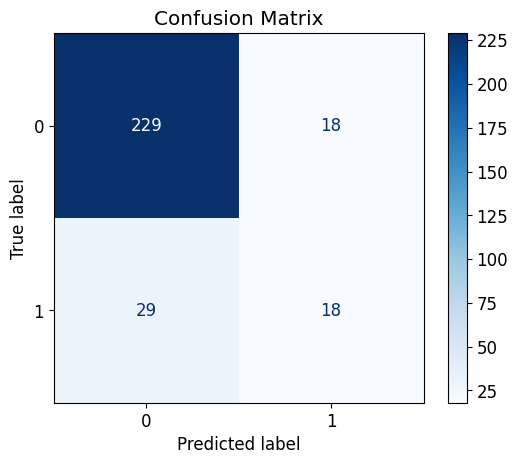

In [ ]:
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

AUC: 0.7666


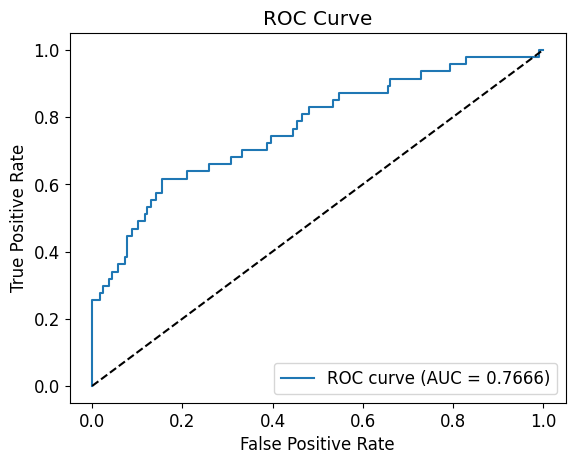

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class '1')
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc_score:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Save model and scaler
with open("attrition_logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("attrition_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

#Save scaled test data
pd.DataFrame(X_test_scaled).to_csv("X_test_attrition_scaled.csv", index=False)

# Save test labels
pd.DataFrame(y_test, columns=['attrition']).to_csv("y_attrition_test.csv", index=False)


files.download("attrition_logistic_model.pkl")
files.download("attrition_scaler.pkl")
files.download("X_test_attrition_scaled.csv")
files.download("y_attrition_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **1. Predicting Employee Attrition (Turnover Prediction):**

In [ ]:
# Load dataset
df = pd.read_csv('/content/cleaned_employee_attrition_data.csv')
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
# Select the required columns
selected_columns = ['age', 'department', 'monthly_income', 'job_satisfaction',
                    'years_at_company', 'marital_status', 'over_time', 'attrition']

# Filter the DataFrame
prediction1 = df[selected_columns].copy()

# Save to CSV
prediction1.to_csv('prediction1_data.csv', index=False)


In [ ]:
prediction1.dtypes

,0
age,int64
department,object
monthly_income,int64
job_satisfaction,int64
years_at_company,int64
marital_status,object
over_time,object
attrition,object


In [ ]:
prediction1.head()

,age,department,monthly_income,job_satisfaction,years_at_company,marital_status,over_time,attrition
0,41,Sales,5993,4,6,Single,Yes,Yes
1,49,Research & Development,5130,2,10,Married,No,No
2,37,Research & Development,2090,3,0,Single,Yes,Yes
3,33,Research & Development,2909,3,8,Married,Yes,No
4,27,Research & Development,3468,2,2,Married,No,No


In [ ]:
# List of categorical columns to encode
categorical_cols = ['department', 'marital_status', 'over_time', 'attrition']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    prediction1[col] = le.fit_transform(prediction1[col])

In [ ]:
prediction1.head()

,age,department,monthly_income,job_satisfaction,years_at_company,marital_status,over_time,attrition
0,41,2,5993,4,6,2,1,1
1,49,1,5130,2,10,1,0,0
2,37,1,2090,3,0,2,1,1
3,33,1,2909,3,8,1,1,0
4,27,1,3468,2,2,1,0,0


In [ ]:
prediction1['attrition'].value_counts()

,count
attrition,
0,1233
1,237


In [ ]:
#to deploy in streamlit we need to save the features soo using this
# 1. Features and Target
X = prediction1.drop('attrition', axis=1)
y = prediction1['attrition']

# If your final training features are in a DataFrame like X
prediction1_names = X.columns.tolist()

# Save feature names as a pickle file
with open("prediction1_feature_names.pkl", "wb") as f:
    pickle.dump(prediction1_names, f)

files.download("prediction1_feature_names.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Features and target
X = prediction1.drop('attrition', axis=1)
y = prediction1['attrition']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# 5. Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_smote)

# 6. Evaluate
y_pred = rf_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.82       247
           1       0.23      0.36      0.28        47

    accuracy                           0.71       294
   macro avg       0.55      0.57      0.55       294
weighted avg       0.76      0.71      0.73       294

Accuracy: 70.75%


In [ ]:
#Cross-validation
clf = RandomForestClassifier(random_state=42)

# 3. Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# 4. Print results
print("🔁 Cross-validation accuracy scores:", cv_scores)
print(f"✅ Mean CV accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"📉 Standard Deviation: {cv_scores.std():.2f}")

🔁 Cross-validation accuracy scores: [0.83333333 0.84353741 0.85714286 0.81292517 0.86054422]
✅ Mean CV accuracy: 84.15%
📉 Standard Deviation: 0.02


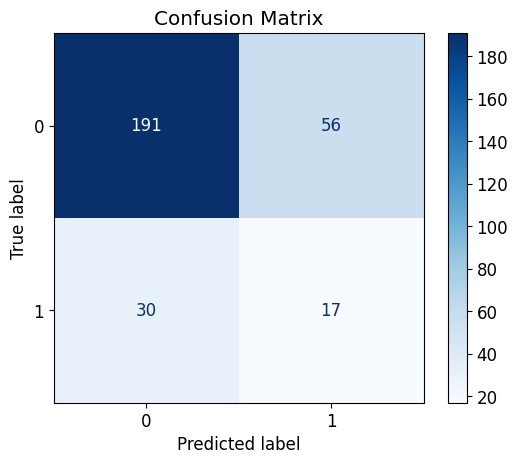

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# Provide the actual class labels (0 and 1) to display_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

🧪 AUC-ROC Score: 0.67


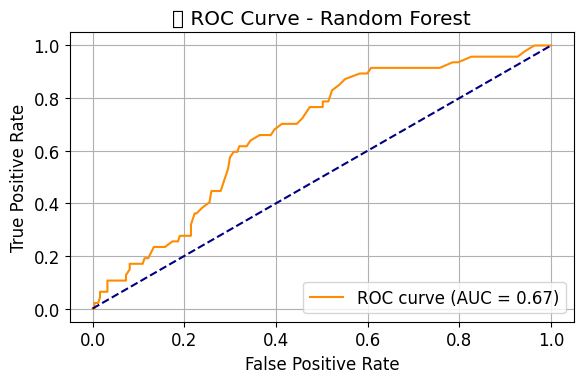

In [ ]:
#Predict probabilities for the positive class (1)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# AUC-ROC Score
auc_score = roc_auc_score(y_test, y_proba)
print(f"🧪 AUC-ROC Score: {auc_score:.2f}")

#  Plot ROC Curve (optional)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🔍 ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Save model and scaler specific to prediction1
with open("prediction1_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("prediction1_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save scaled test data for prediction1
pd.DataFrame(X_test_scaled).to_csv("X_test_prediction1_scaled.csv", index=False)

# Save test labels for prediction1
pd.DataFrame(y_test, columns=['attrition']).to_csv("y_prediction1_test.csv", index=False)

# Download the files
files.download("prediction1_rf_model.pkl")
files.download("prediction1_scaler.pkl")
files.download("X_test_prediction1_scaled.csv")
files.download("y_prediction1_test.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Predicting Performance Rating:**

In [ ]:
import pandas as pd
# Load dataset
df = pd.read_csv('/content/cleaned_employee_attrition_data.csv')


In [ ]:
# Select the required columns
selected_columns = ['education',
    'job_involvement',
    'job_level',
    'monthly_income',
    'years_at_company',
    'years_in_current_role',
    'performance_rating']

# Filter the DataFrame
prediction2 = df[selected_columns].copy()

# Save to CSV
#prediction2.to_csv('prediction2_data.csv', index=False)

In [ ]:
prediction2['performance_rating'].unique()
prediction2['performance_rating'].value_counts()

,count
performance_rating,
3,1244
4,226


In [ ]:
prediction2.head()

,education,job_involvement,job_level,monthly_income,years_at_company,years_in_current_role,performance_rating
0,2,3,2,5993,6,4,3
1,1,2,2,5130,10,7,4
2,2,2,1,2090,0,0,3
3,4,3,1,2909,8,7,3
4,1,3,1,3468,2,2,3


# **Ml Model**

In [ ]:
# 1. Features and target
X = prediction2.drop('performance_rating', axis=1)
y = prediction2['performance_rating']

# If your final training features are in a DataFrame like X
prediction2_names = X.columns.tolist()

# Save feature names as a pickle file
with open("prediction2_feature_names.pkl", "wb") as f:
    pickle.dump(prediction2_names, f)

#files.download("prediction2_feature_names.pkl")

In [ ]:
# 1. Features and target
X = prediction2.drop('performance_rating', axis=1)
y = prediction2['performance_rating']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# 5. Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_smote)

# 6. Evaluate
y_pred = rf_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Classification Report:
               precision    recall  f1-score   support

           3       0.87      0.79      0.83       249
           4       0.22      0.33      0.27        45

    accuracy                           0.72       294
   macro avg       0.54      0.56      0.55       294
weighted avg       0.77      0.72      0.74       294

Accuracy: 71.77%


In [ ]:
#Cross-validation
clf = RandomForestClassifier(random_state=42)

# 5-fold CV on the whole dataset (before train-test split & SMOTE)
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"📉 Standard Deviation: {cv_scores.std():.2f}")

Cross-validation accuracy scores: [0.81632653 0.81972789 0.80612245 0.81292517 0.82312925]
Mean CV accuracy: 81.56%
📉 Standard Deviation: 0.01


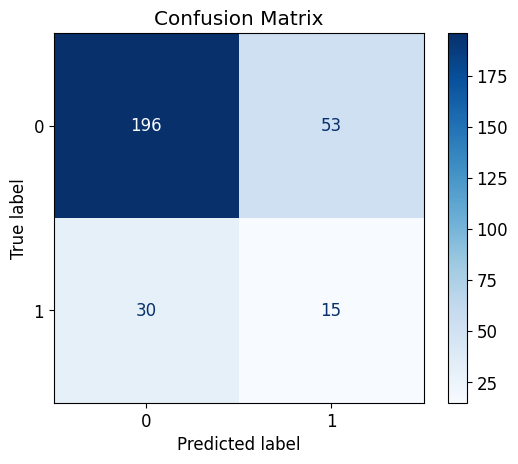

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# Provide the actual class labels (0 and 1) to display_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

🧪 AUC-ROC Score: 0.55


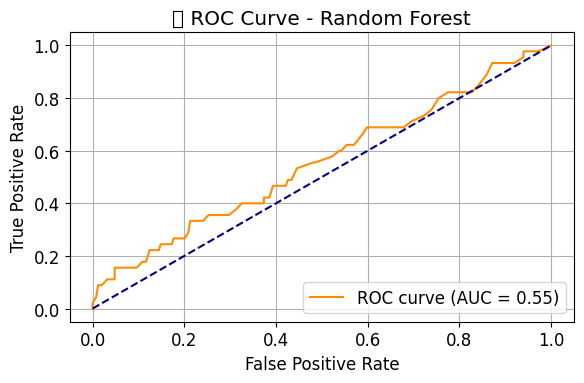

In [ ]:
#Predict probabilities for the positive class (1)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# AUC-ROC Score
auc_score = roc_auc_score(y_test, y_proba)
print(f"🧪 AUC-ROC Score: {auc_score:.2f}")

#  Plot ROC Curve (optional)
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=4)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🔍 ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

# Save model and scaler specific to prediction2
with open("prediction2_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f) # Saves the RandomForestClassifier

with open("prediction2_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save scaled test data for prediction2
pd.DataFrame(X_test_scaled).to_csv("X_test_prediction2_scaled.csv", index=False)

# Save test labels for prediction2
pd.DataFrame(y_test, columns=['performance_rating']).to_csv("y_prediction2_test.csv", index=False)


# Download the files you want
files.download("prediction2_rf_model.pkl") # This downloads the RandomForest model
files.download("prediction2_scaler.pkl")
files.download("X_test_prediction2_scaled.csv")
files.download("y_prediction2_test.csv")